In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('loan_data.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [3]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

1. Handling Missing Value

In [4]:
data.drop(['Loan_ID'], axis=1, inplace=True)

In [5]:
data.isna().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
fill_gender = data['Gender'].mode(0)
fill_gender

0    Male
Name: Gender, dtype: object

In [7]:
data['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
376      Male
377      Male
378    Female
379      Male
380    Female
Name: Gender, Length: 381, dtype: object

In [8]:
data['Gender'] = data['Gender'].replace({np.nan: 'Female'})
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [9]:
data['Dependents'].unique()

array(['1', '0', '2', '3+', nan], dtype=object)

In [10]:
data['Dependents'].mode(0)

0    0
Name: Dependents, dtype: object

In [11]:
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [12]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
data['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [14]:
data['Self_Employed'].fillna('Yes', inplace=True)

In [15]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [16]:
data['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [17]:
def cat_to_num (df, col):
    for i in col:
        unique_val = df[i].unique()
        df[i].replace(unique_val, [0, 1], inplace=True)

    for i in ['Property_Area']:
        unique_val = df[i].unique()
        df[i].replace(unique_val, [0, 1, 3], inplace=True)

In [18]:
cols_variable = ['Gender', 'Married', 'Education', 'Education','Self_Employed', 'Loan_Status']

cat_to_num(data, cols_variable)

In [19]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,1,1
2,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,1,1
3,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,1
4,0,0,0,1,0,2333,1516.0,95.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,0,0,3+,0,0,5703,0.0,128.0,360.0,1.0,1,1
377,0,0,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
378,1,1,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
379,0,0,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1


In [20]:
data.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [21]:
data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [22]:
data['Dependents'] = data['Dependents'].replace(['0', '1', '2','3+'], [0, 1, 2, 3])
data.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

2.Using LinearRegression Imputer

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [24]:
regressor = LinearRegression()
imputer = IterativeImputer(estimator=regressor, random_state=0)

fit = imputer.fit_transform(data)

In [25]:
fit

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 0., ..., 1., 0., 1.],
       [0., 0., 3., ..., 1., 0., 1.],
       [1., 1., 0., ..., 0., 3., 0.]])

In [26]:
df_imputed = pd.DataFrame(fit, columns=data.columns)

In [66]:
df_imputed

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,1.0,1.0
2,0.0,0.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,2333.0,1516.0,95.0,360.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
376,0.0,0.0,3.0,0.0,0.0,5703.0,0.0,128.0,360.0,1.0,1.0,1.0
377,0.0,0.0,0.0,0.0,0.0,3232.0,1950.0,108.0,360.0,1.0,0.0,1.0
378,1.0,1.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1.0
379,0.0,0.0,3.0,0.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1.0


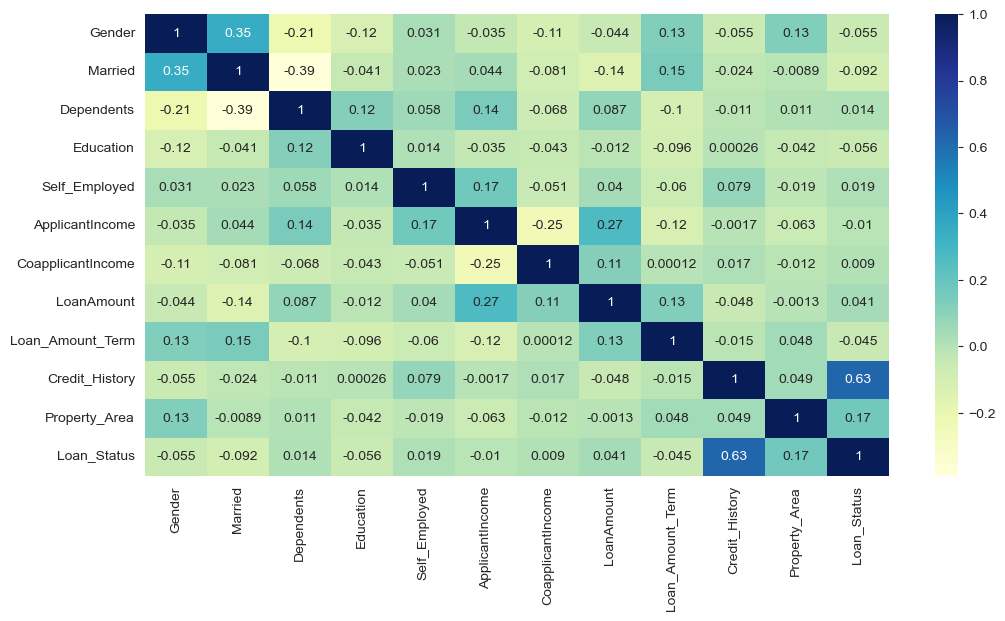

In [67]:
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.heatmap(df_imputed.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [ ]:
sns.pairplot(df_imputed)

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

C:\Users\Nicolaus\AppData\Local\Temp\ipykernel_35184\517897729.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imputed['Education'])
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Axes: xlabel='Education', ylabel='Density'>

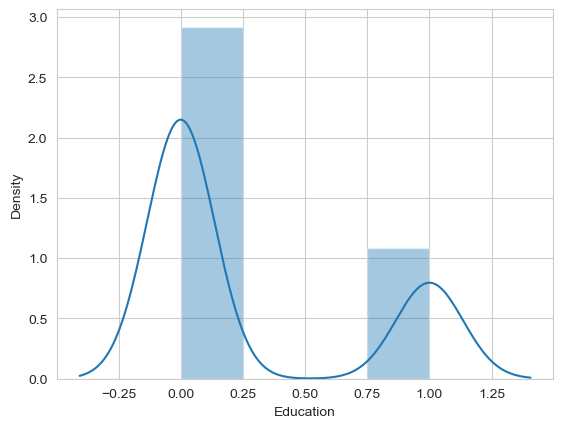

In [30]:
sns.distplot(df_imputed['Education'])

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
frame = scaler.fit_transform(df_imputed)

In [36]:
dataframe = pd.DataFrame(frame, columns= df_imputed.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

3. splitting dataset to X, y and standard scaling for features

In [34]:
from sklearn.model_selection import train_test_split

X = df_imputed.drop('Loan_Status', axis=1)
y = df_imputed['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [33]:
X_train

array([[-0.57445626,  1.21900833, -0.64720598, ...,  0.29473256,
         0.44339505, -0.39427424],
       [-0.57445626,  1.21900833, -0.64720598, ...,  0.29473256,
         0.44339505, -0.39427424],
       [-0.57445626, -0.82033894, -0.64720598, ...,  0.29473256,
         0.44339505,  1.23172495],
       ...,
       [-0.57445626,  1.21900833, -0.64720598, ...,  0.29473256,
         0.44339505, -1.20727383],
       [ 1.74077656,  1.21900833, -0.64720598, ...,  0.29473256,
        -2.31691865,  1.23172495],
       [-0.57445626, -0.82033894,  0.42877396, ...,  0.29473256,
         0.44339505,  1.23172495]])

In [34]:
X_test

array([[ 1.94722024,  1.22474487,  0.16720466, ...,  0.27436127,
         0.41842391, -1.16646727],
       [-0.51355259,  1.22474487,  1.08284923, ...,  0.27436127,
        -2.46405675, -1.16646727],
       [ 1.94722024,  1.22474487, -0.74843991, ...,  0.27436127,
         0.41842391,  1.09438221],
       ...,
       [-0.51355259, -0.81649658, -0.74843991, ...,  0.27436127,
         0.41842391, -1.16646727],
       [-0.51355259,  1.22474487, -0.74843991, ...,  0.27436127,
        -2.46405675,  1.09438221],
       [-0.51355259, -0.81649658, -0.74843991, ...,  0.27436127,
         0.41842391,  1.09438221]])

6. Prediction using DecisionTreeClassifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)

In [36]:
y_train_pred = model.predict(X_train)

In [37]:
from sklearn.metrics import accuracy_score

print('Accuracy score model: ', accuracy_score(y_train, y_train_pred))

Accuracy score model:  0.8646616541353384


In [38]:
y_test_pred = model.predict(X_test)

print('Accuracy score prediction: ', accuracy_score(y_test, y_test_pred))

Accuracy score prediction:  0.8347826086956521


confusion metrics

<Axes: >

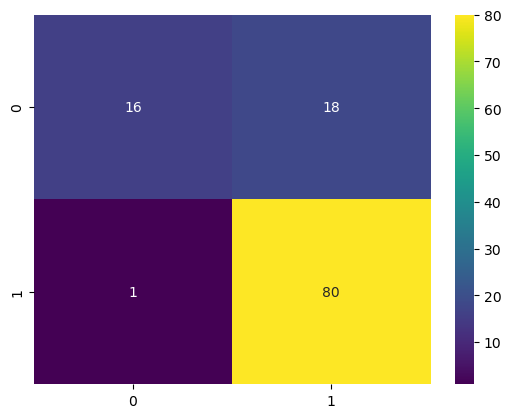

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='viridis', cbar=True)

Prediction using SVC

In [41]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [42]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [43]:
print('Accuracy of Model:', accuracy_score(y_train, y_train_pred))

Accuracy of Model: 0.8721804511278195


In [44]:
print('Accuracy score prediction: ', accuracy_score(y_test, y_test_pred))

Accuracy score prediction:  0.8260869565217391


<Axes: >

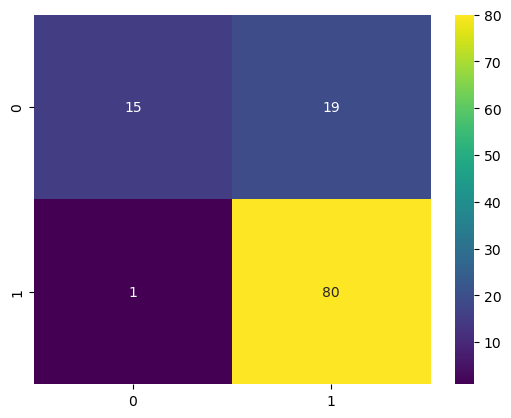

In [45]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, cmap='viridis', cbar=True)